In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from algorithms.MAB import MAB
from algorithms.reward_model import LinearRewardModel, EqualGapRewardModel
from algorithms.bai.ftas import FTaS
from algorithms.bai.tas import TaS
from algorithms.bai.uniform import UniformBAI
from algorithms.fairness_model import ProportionalFairnessModel, VectorFairnessModel, make_prespecified_fairness_model
from tqdm import tqdm
from numpy.typing import NDArray
import pickle
from scipy.stats import bootstrap
import matplotlib.ticker as mtick
import seaborn as sns
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def compute_confidence(x):
    mean = np.mean(x)
    ci = bootstrap((x,), statistic=np.mean).confidence_interval
    ci = (np.nan_to_num(ci.low, nan =0), np.nan_to_num(ci.high, nan =0))
    return mean, ci

In [ ]:
K = 15
R_MAX = 5
p0_linear = 0.7
p0_equalgap = 0.99
SOLVER = cp.ECOS
NUM_CPUS = 5
DELTA = 1e-2
N_SIM = 10
DELTAS = [1e-3, 1e-2, 1e-1]
models = [
    ('Linear gaps, agonistic fairness', LinearRewardModel(R_MAX = R_MAX, K=K), ProportionalFairnessModel(K, p0=p0_linear, use_gaps=True, invert=True), 'thetadep_linear_gaps_agonistic'),
    ('Linear gaps, antagonistic fairness', LinearRewardModel(R_MAX = R_MAX, K=K), ProportionalFairnessModel(K, p0=p0_linear, use_gaps=True, invert=False), 'thetadep_linear_gaps_antagonistic'),
]

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
idx = 0
for idx, (name, reward_model, fairness_model, filename) in enumerate(models):
    instance = MAB(reward_model=reward_model, fairness_model=None)
    [w,sol,t] = instance.solve_T_star(SOLVER=SOLVER)

    instance = MAB(reward_model=reward_model, fairness_model=fairness_model)
    [w_fair,sol_fair,t] = instance.solve_T_star(SOLVER=SOLVER, FAIR=True)

    ax[idx].plot(np.arange(1,K+1),w, 'k', label = r"$w^\star$")
    ax[idx].plot(np.arange(1,K+1),w_fair, "g--",label = r"$w_{p}^\star$")
    ax[idx].stem(np.arange(1,K+1), instance.f(instance.THETA), "r--", label = r"Fairness $p(\theta)$")
    ax[idx].grid(linestyle = ":")
    ax[idx].set_xlabel(r'Arms $a$')
    print(f"[{name}]: T*_{{theta}} = {sol}\nT*_{{theta,p}} = {sol_fair}\n p = {instance.f(instance.THETA)} - psum: {instance.f(instance.THETA).sum()} - pmin: {instance.f(instance.THETA).min()}")
    print('------------------------------------')
    
    idx += 1

ax[0].set_title('Linear gaps, agonistic fairness')
ax[1].set_title('Linear gaps, antagonistic fairness')
ax[0].set_ylabel('Probability')
ax[0].legend()
plt.suptitle(r'$\theta$-dependent rates')
plt.savefig('images/bai/synthetic/thetadep_allocation.pdf', bbox_inches='tight')

------ [0.001]: thetadep_linear_gaps_agonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(Degenera

[F-TaS] Sample complexity: 891.82 ((828.9239055529657, 961.59)) - P(err): 0.0 ((0.0, 0.0))
[TaS] Sample complexity: 1272.28 ((1156.103102251071, 1391.0113441533404)) - P(err): 0.0 ((0.0, 0.0))
[Uniform Fair] Sample complexity: 1433.4 ((1321.108397028983, 1554.7291466895595)) - P(err): 0.0 ((0.0, 0.0))
------ [0.001]: thetadep_linear_gaps_antagonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(Degenera

[F-TaS] Sample complexity: 2053.25 ((1874.01154389157, 2261.291070622367)) - P(err): 0.0 ((0.0, 0.0))
[TaS] Sample complexity: 1272.28 ((1161.225518545853, 1390.997270723715)) - P(err): 0.0 ((0.0, 0.0))
[Uniform Fair] Sample complexity: 10740.08 ((9782.118099485378, 11825.6178324397)) - P(err): 0.0 ((0.0, 0.0))


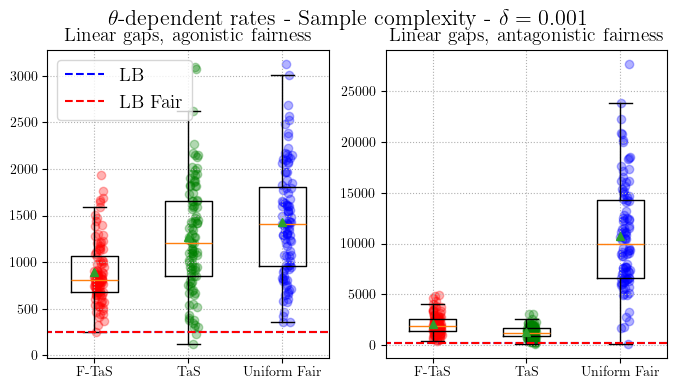

------ [0.01]: thetadep_linear_gaps_agonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(Degenera

[F-TaS] Sample complexity: 658.86 ((604.4536220192182, 721.6345795409708)) - P(err): 0.0 ((0.0, 0.0))
[TaS] Sample complexity: 837.94 ((754.0884892014453, 936.2880520374937)) - P(err): 0.0 ((0.0, 0.0))
[Uniform Fair] Sample complexity: 1052.03 ((951.6491168351703, 1160.4)) - P(err): 0.0 ((0.0, 0.0))
------ [0.01]: thetadep_linear_gaps_antagonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(Degenera

[F-TaS] Sample complexity: 1559.28 ((1394.7280543522731, 1752.9830205411295)) - P(err): 0.0 ((0.0, 0.0))
[TaS] Sample complexity: 837.94 ((752.2178391428137, 936.6897277007919)) - P(err): 0.0 ((0.0, 0.0))
[Uniform Fair] Sample complexity: 7666.75 ((6842.309949483329, 8591.185309231936)) - P(err): 0.0 ((0.0, 0.0))


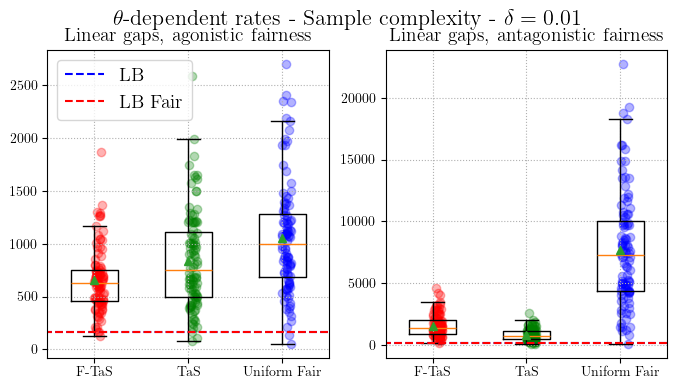

------ [0.1]: thetadep_linear_gaps_agonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(Degenera

[F-TaS] Sample complexity: 404.89 ((362.7629408586834, 452.020618149315)) - P(err): 0.0 ((0.0, 0.0))
[TaS] Sample complexity: 488.01 ((429.65213106219977, 559.7927335660428)) - P(err): 0.0 ((0.0, 0.0))
[Uniform Fair] Sample complexity: 673.91 ((608.6076999749331, 747.7044264431382)) - P(err): 0.0 ((0.0, 0.0))
------ [0.1]: thetadep_linear_gaps_antagonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(Degenera

[F-TaS] Sample complexity: 936.52 ((825.5256150492169, 1059.4739014533072)) - P(err): 0.0 ((0.0, 0.0))
[TaS] Sample complexity: 488.01 ((427.8478856613806, 562.5290790108077)) - P(err): 0.0 ((0.0, 0.0))
[Uniform Fair] Sample complexity: 4905.09 ((4283.660706795005, 5624.009811130021)) - P(err): 0.0 ((0.0, 0.0))


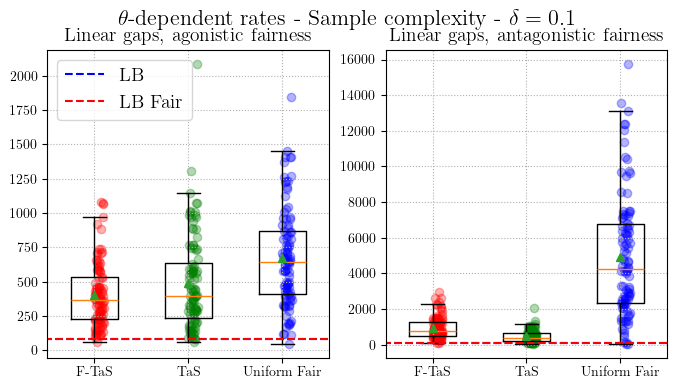

In [16]:

box_width = 0.5
points_width = 0.1
alpha_val = 0.3
colors = ["r","g","b"]
K = 15
R_MAX = 5
p0_linear = 0.7
p0_equalgap = 0.99
SOLVER = cp.ECOS
NUM_CPUS = 5
DELTA = 1e-2
N_SIM = 10
DELTAS = [1e-3, 1e-2, 1e-1]
models = [
    ('Linear gaps, agonistic fairness', LinearRewardModel(R_MAX = R_MAX, K=K), ProportionalFairnessModel(K, p0=p0_linear, use_gaps=True, invert=True), 'thetadep_linear_gaps_agonistic'),
    ('Linear gaps, antagonistic fairness', LinearRewardModel(R_MAX = R_MAX, K=K), ProportionalFairnessModel(K, p0=p0_linear, use_gaps=True, invert=False), 'thetadep_linear_gaps_antagonistic'),
]


for delta in DELTAS:
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    for idx, (name, reward_model, fairness_model, filename) in enumerate(models):
        print(f'------ [{delta}]: {filename} ------')
        with open(f'data/synthetic/delta_{delta}/{filename}_{delta}.pkl', 'rb') as f:
            results = pickle.load(f)
            items = list(results.items())
            index = next(i for i, (k, v) in enumerate(items) if k == "F-BAI")
            del items[index]
            items.insert(index, ("F-TaS", results.pop('F-BAI', None)))
            
            results = dict(items)
        instance = MAB(reward_model=reward_model, fairness_model=None)

        [w,sol,t] = instance.solve_T_star(SOLVER=SOLVER)
        [w_fair,sol_fair,t] = instance.solve_T_star(SOLVER=SOLVER, FAIR=True)
            
        

        for idx_algo, algo_name in enumerate(results.keys()):
            mu_tau, ci_tau = compute_confidence(results[algo_name]['t_vec'])
            mu_perr, ci_err = compute_confidence(results[algo_name]['p_err'])
            print(f"[{algo_name}] Sample complexity: {mu_tau} ({ci_tau}) - P(err): {mu_perr} ({ci_err})")


            ax[idx].scatter(idx_algo+1+np.random.rand(len(results[algo_name]['t_vec']))*points_width, results[algo_name]['t_vec'], alpha = alpha_val , c = colors[idx_algo])
            ax[idx].boxplot(results[algo_name]['t_vec'],positions = [idx_algo+1],showfliers=False, widths=(box_width), showmeans=True)

            

        ax[idx].plot(np.arange(6),np.ones(6)*sol*np.log(1/delta),"b--",label = "LB")
        ax[idx].plot(np.arange(6),np.ones(6)*sol_fair*np.log(1/delta),"r--",label = "LB Fair")
        ax[idx].set_xticks([k+1 for k in range(len(results.keys()))], results.keys())
        ax[idx].set_xlim([0.5, len(results.keys()) + 0.5])
        #plt.yscale('log')
        #ax[idx].legend()
        ax[idx].set_title(f'{name}')
        ax[idx].grid(linestyle = ":")
    ax[0].legend()
    plt.suptitle(f'$\\theta$-dependent rates - Sample complexity - $\\delta = {delta}$')
    plt.savefig(f'images/bai/synthetic/thetadep_sample_complexity_{delta}.pdf', bbox_inches='tight')

    plt.show()

------ [0.001]: thetadep_linear_gaps_agonistic ------


/Users/esurael/Github/fair-best-arm-identification/algorithms/fairness_model.py:89: RuntimeWarning: divide by zero encountered in divide
  x = np.nan_to_num(1/x, nan=delta_min_inv, posinf=delta_min_inv,neginf=delta_min_inv)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/Github/fair-best-arm-identification/algorithms/fairness_model.py:89: RuntimeWarning: divide by zero encountered in divide
  x = np.nan_to_num(1/x, nan=delta_min_inv, posinf=delta_min_inv,neginf=delta_min_inv)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

------ [0.001]: thetadep_linear_gaps_antagonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


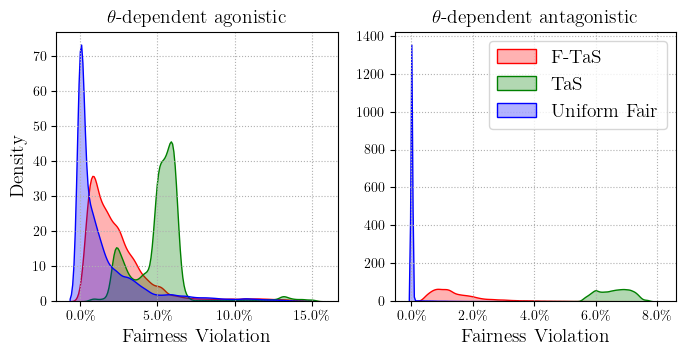

------ [0.01]: thetadep_linear_gaps_agonistic ------


/Users/esurael/Github/fair-best-arm-identification/algorithms/fairness_model.py:89: RuntimeWarning: divide by zero encountered in divide
  x = np.nan_to_num(1/x, nan=delta_min_inv, posinf=delta_min_inv,neginf=delta_min_inv)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/Github/fair-best-arm-identification/algorithms/fairness_model.py:89: RuntimeWarning: divide by zero encountered in divide
  x = np.nan_to_num(1/x, nan=delta_min_inv, posinf=delta_min_inv,neginf=delta_min_inv)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

------ [0.01]: thetadep_linear_gaps_antagonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


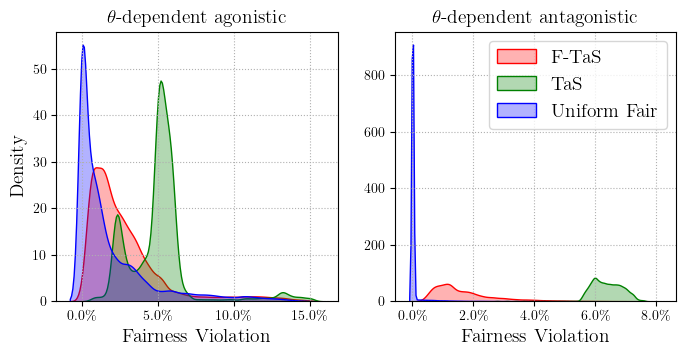

------ [0.1]: thetadep_linear_gaps_agonistic ------


/Users/esurael/Github/fair-best-arm-identification/algorithms/fairness_model.py:89: RuntimeWarning: divide by zero encountered in divide
  x = np.nan_to_num(1/x, nan=delta_min_inv, posinf=delta_min_inv,neginf=delta_min_inv)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/Github/fair-best-arm-identification/algorithms/fairness_model.py:89: RuntimeWarning: divide by zero encountered in divide
  x = np.nan_to_num(1/x, nan=delta_min_inv, posinf=delta_min_inv,neginf=delta_min_inv)
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

------ [0.1]: thetadep_linear_gaps_antagonistic ------


/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/esurael/miniconda3/envs/fbai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


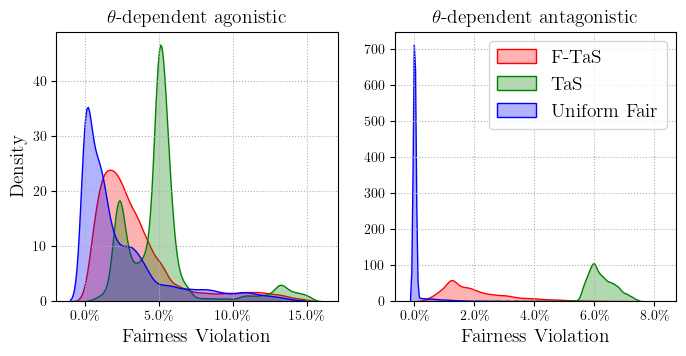

In [17]:
DELTAS = [1e-3, 1e-2, 1e-1]
colors = ["r","g","b"]


for delta in DELTAS:
    idx=0
    fig, ax = plt.subplots(1,2, sharey=False, figsize=(8,3.5))
    for _, (name, reward_model, fairness_model, filename) in enumerate(models):
        if 'Equal' in name or 'equal' in name: continue
        print(f'------ [{delta}]: {filename} ------')
        with open(f'data/synthetic/delta_{delta}/{filename}_{delta}.pkl', 'rb') as f:
            results = pickle.load(f)
            items = list(results.items())
            index = next(i for i, (k, v) in enumerate(items) if k == "F-BAI")
            del items[index]
            items.insert(index, ("F-TaS", results.pop('F-BAI', None)))
            
            results = dict(items)
        instance = MAB(reward_model=reward_model, fairness_model=None)
        [w,sol,t] = instance.solve_T_star(SOLVER=SOLVER)

        instance = MAB(reward_model=reward_model, fairness_model=fairness_model)
        [w_fair,sol_fair,t] = instance.solve_T_star(SOLVER=SOLVER, FAIR=True)

        mask = instance.f(instance.THETA) > 0

        for idx_algo, algo_name in enumerate(results.keys()):
            w_fair_vec = results[algo_name]['w_vec']

            fairness_res_fbai = np.array(
                [max(0,np.max(instance.f(instance.THETA) - sample))  for x in w_fair_vec  for t, sample in enumerate(x)])

            sns.kdeplot(fairness_res_fbai, label=algo_name, ax=ax[idx], fill=True, alpha=0.3, color=colors[idx_algo])
        
        ax[idx].set_xlabel(r'Fairness Violation')
        ax[idx].set_ylabel(r'Density' if idx == 0 else '')
        ax[idx].set_title('$\\theta$-dependent agonistic' if idx == 0 else '$\\theta$-dependent antagonistic')
        ax[idx].grid(linestyle = ":")
        ax[idx].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
        idx+= 1
    #plt.suptitle(f'$\\delta={delta}$')
    plt.legend()

    plt.savefig(f"images/BAI/synthetic/thetadep_violation_{delta}.pdf", bbox_inches='tight')
    plt.show()

In [ ]:
for idx, (name, reward_model, fairness_model, filename) in enumerate(models):
    with open(f'data/{filename}.pkl', 'rb') as f:
        results = pickle.load(f)
    instance = MAB(reward_model=reward_model, fairness_model=None)

    [w,sol,t] = instance.solve_T_star(SOLVER=SOLVER)
    instance = MAB(reward_model=reward_model, fairness_model=fairness_model)
    [w_fair,sol_fair,t] = instance.solve_T_star(SOLVER=SOLVER, FAIR=True)

    mask = instance.f(instance.THETA) > 0

    for algo_name in results.keys():
        w_fair_vec = results[algo_name]['w_vec']

        def tolerant_mean(arrs):
            lens = [len(i) for i in arrs]
            arr = np.ma.empty((np.max(lens),len(arrs)))
            arr.mask = True
            for idx, l in enumerate(arrs):
                arr[:len(l),idx] = l
            return arr.mean(axis = -1), arr.std(axis=-1, ddof=1)


        Z_vec_list = [[] for _ in range(K)]
        for n in range(N_SIM):
            for c in range(K):
                if mask[c] == False: continue
                Z_arr = np.array(w_fair_vec[n]- instance.f(instance.THETA))
                Z_arr[Z_arr<0] = 0
                Z_arr = np.abs(Z_arr)
                Z_vec_list[c].append(list(Z_arr[:, c]))

        y_vec = []
        err_vec = []
        for c in range(K):
            if mask[c] == False: continue
            y, error = tolerant_mean(Z_vec_list[c])
            y_vec.append(y.data)
            err_vec.append(error.data)
        y = np.mean(np.array(y_vec),axis = 0)

        err = np.mean(np.array(err_vec),axis = 0)
        plt.plot(y,label =algo_name)
        plt.fill_between(np.arange(len(y)) + 1, y-err, y+err, alpha = 0.1,label='_nolegend_')
    plt.legend()
    plt.show()


In [ ]:

def compute_confidence(x):
    z = x.mean(0)
    mean_ci = bootstrap((z,), statistic=np.mean).confidence_interval
    max_ci = bootstrap((z,), statistic=np.max).confidence_interval
    min_ci = bootstrap((z,), statistic=np.min).confidence_interval

    y = x.min(-1)
    mean_violation = bootstrap((y,), statistic=np.mean).confidence_interval


    return mean_ci, max_ci, min_ci, mean_violation


for idx, (name, reward_model, fairness_model, filename) in enumerate(models):
    with open(f'data/{filename}.pkl', 'rb') as f:
        results = pickle.load(f)
    instance = MAB(reward_model=reward_model, fairness_model=None)

    [w,sol,t] = instance.solve_T_star(SOLVER=SOLVER)
    instance = MAB(reward_model=reward_model, fairness_model=fairness_model(w))
    [w_fair,sol_fair,t] = instance.solve_T_star(SOLVER=SOLVER, FAIR=True)

    mask = instance.f(instance.THETA) > 0
    print(f'--------- {name} ---------')

    for _, algo_name in enumerate(results.keys()):
        w_fair_vec = results[algo_name]['w_vec']
        fairness_res_fbai = np.array([x[-1] for x in w_fair_vec]) - instance.f(instance.THETA)[None,:]
        fair_bai_res = compute_confidence(fairness_res_fbai)
        print('-------------------------------------')
        print(f'{algo_name}')
        print(f'Avg(E[N_a(tau)]/E[tau] - p(theta)) in ({fair_bai_res[0].low}, {fair_bai_res[0].high}) with 95% confidence')
        print(f'max_a E[N_a(tau)]/E[tau] - p(theta) in ({fair_bai_res[1].low}, {fair_bai_res[1].high}) with 95% confidence')
        print(f'min_a E[N_a(tau)]/E[tau] - p(theta) in ({fair_bai_res[2].low}, {fair_bai_res[2].high}) with 95% confidence')
        print(f'E[min_a N_a(tau)/tau] - p(theta) in ({fair_bai_res[3].low}, {fair_bai_res[3].high}) with 95% confidence')